## Loading the data sets

In [27]:
import nltk
import pandas as pd

In [28]:
messages= pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names =['label', 'message'])

In [29]:
messages.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [30]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [31]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [32]:
messages['length']= messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

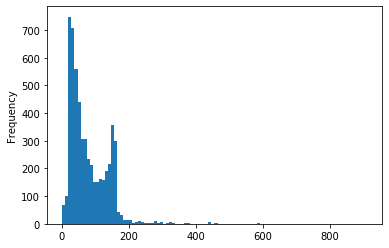

In [34]:
messages['length'].plot.hist(bins=100)

In [35]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [36]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000203BDDFC988>,
      dtype=object)

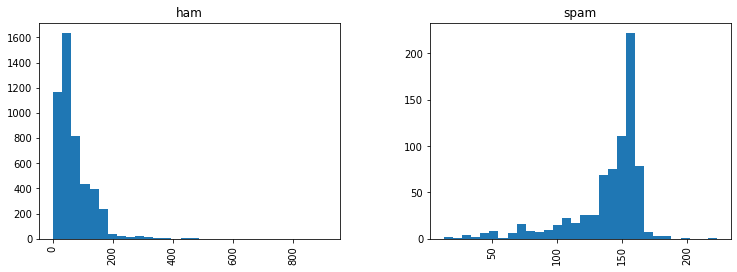

In [37]:
messages.hist(column='length',by='label', bins=30, figsize=(12,4))

## Text Pre-processing

In [38]:
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\S.N
[nltk_data]     sinha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
def text_process(mess):
    nopunc= [char for char in mess if char not in string.punctuation]
    
    nopunc= ''.join(nopunc)
    
    return [words for words in nopunc.split() if words.lower() not in stopwords.words('english')]

original datasets

In [40]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


we are checking to make sure its working

In [41]:
messages['message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

## Counting Normalization

Lets convert our clean text into a representation that a machine learning model can understand.

Bag of Words techinques are:

->TFIDF 

->Count Vectorizer

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

print total number of voacabs

In [44]:
print(len(bow_transformer.vocabulary_))

11425


Let's take one text message and get its bag-of-words counts as a vector

In [45]:
print( messages['message'][3] )

U dun say so early hor... U c already then say...


Now let's see its vector representation:

In [46]:
bow4= bow_transformer.transform([messages['message'][3]])
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


This means that there are seven unique words in message number 4 (after removing common stop words). Two of them appear twice, the rest only once. Let's go ahead and check and confirm which ones appear twice:

In [47]:
print(bow_transformer.get_feature_names()[4068])
print(bow_transformer.get_feature_names()[9554])

U
say


Now we can use **.transform** on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages.

In [48]:
messages_bow = bow_transformer.transform(messages['message'])

In [49]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [50]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


tfidf means term frequency inverse document frequency

In [51]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer= TfidfTransformer().fit(messages_bow)

checking for 4th element

In [52]:
tfidf4= tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


We'll go ahead and check what is the IDF (inverse document frequency) of the word `"u"` and of word `"university"`

In [53]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


To transform the entire bag-of-words corpus into TF-IDF corpus at once:

In [54]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


## Training the model

With messages represented as vectors, we can finally train our spam/ham classifier. We will use the Naive Bayes classifier algorithm.

We'll be using scikit-learn here, choosing the Naive Bayes classifier 

In [55]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

Let's try classifying our single random message

In [56]:
print('predicted:', spam_detect_model.predict(tfidf4))
print('expected:', messages.label[3])

predicted: ['ham']
expected: ham


We've developed a model that can attempt to predict spam vs ham classification!

## Model Evaluation

Now we want to determine how well our model will do overall on the entire dataset

In [57]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [1]:
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_predictions))

NameError: name 'messages' is not defined

## Train Test Split

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(X_train), len(X_test), len(X_train) + len(X_test))

4457 1115 5572


In [60]:
import pickle

In [62]:
saved_model=pickle.dumps(spam_detect_model)

In [63]:
modelfrom_pickle = pickle.loads(saved_model) 

In [77]:
all_predictions =modelfrom_pickle.predict(messages_tfidf)

In [79]:
import joblib

In [80]:
joblib.dump(spam_detect_model,'pickle.pkl')

['pickle.pkl']

In [84]:
joblib.dump(messages_bow,'tranform.pkl')

['tranform.pkl']